In [1]:
#
# libraries
#
import pandas as pd
from sklearn.linear_model import LinearRegression as OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
#

In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 

In [2]:
#
# utility function for plotting histograms in a grid
#
def plot_histogram_grid(df, variables, n_rows, n_cols, bins):
    fig = plt.figure(figsize = (11, 11))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
#
# for some variables there are relatively few unique values, so we'll
# adjust the histogram appearance accordingly to avoid "gaps" in the plots
#    
        if len(np.unique(df[var_name])) <= bins:
          use_bins = len(np.unique(df[var_name]))
        else:
          use_bins = bins
#      
        df[var_name].hist(bins = use_bins, ax = ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()
#
# utility function for plotting scatterplots in a grid
#
def plot_scatter_grid(df, y_cols, x_var, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize = (15, 15))
    fig.tight_layout(pad = 2)
    for row in range(rows):
        for col in range(cols):
            if (row * (cols - 1) + col) <= (len(y_cols) - 1):
                plot_col = y_cols[row * (cols - 1) + col]
                ax[row, col].scatter(my_data[x_var], my_data.loc[:, plot_col])
                ax[row, col].set_title(plot_col + ' vs. ' + x_var)
            else:
                fig.delaxes(ax[row, col])
    plt.show()
#    

In [3]:
#
# load data
#
my_data = pd.read_csv('Datasets\\CO_sensors.csv')
my_data.head()
#

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.21,26.38,247.2771,0.1994,0.5114,0.5863,0.5716,1.9386,1.1669,0.7103,0.5541,51.0146,40.8079,47.8748,4.6007,1.0259,0.6300,0.4302
1,0.311,0.0,49.21,26.38,243.3618,0.7158,0.0626,0.1586,0.1161,0.1347,0.1385,0.1545,0.1307,0.1935,0.1341,0.1773,0.1403,0.1399,0.1243,0.1236
2,0.620,0.0,49.21,26.38,242.4944,0.8840,0.0654,0.1496,0.1075,0.1076,0.1131,0.1363,0.1188,0.1195,0.1049,0.1289,0.1189,0.1216,0.1106,0.1130
3,0.930,0.0,49.21,26.38,241.6242,0.8932,0.0722,0.1444,0.1074,0.1032,0.1106,0.1306,0.1190,0.1125,0.1014,0.1232,0.1153,0.1185,0.1091,0.1114
4,1.238,0.0,49.21,26.38,240.8151,0.8974,0.0767,0.1417,0.1098,0.1025,0.1116,0.1284,0.1208,0.1111,0.1008,0.1226,0.1140,0.1175,0.1090,0.1111


In [4]:
#
my_data.describe().T
#

,count,mean,std,min,25%,50%,75%,max
Time (s),295700.0,45435.140266,26245.705362,0.0000,22696.21350,45430.5430,68165.08150,90901.7260
CO (ppm),295700.0,9.900266,6.426957,0.0000,4.44000,8.8900,15.56000,20.0000
Humidity (%r.h.),295700.0,45.607506,12.445601,16.4300,36.14000,46.7000,55.37000,72.9800
Temperature (C),295700.0,26.720057,0.418020,25.3800,26.38000,26.6600,27.06000,27.4200
Flow rate (mL/min),295700.0,239.943680,1.697848,0.0000,239.90420,239.9716,240.03660,262.3167
Heater voltage (V),295700.0,0.355212,0.288572,0.1990,0.20000,0.2000,0.20700,0.9010
R1 (MOhm),295700.0,15.198374,22.583110,0.0324,0.40480,1.7121,25.85040,119.5851
R2 (MOhm),295700.0,17.440031,26.665302,0.0555,0.48140,1.3664,29.05830,142.5199
R3 (MOhm),295700.0,22.151461,28.585001,0.0541,0.57940,4.0667,44.88580,127.2483
R4 (MOhm),295700.0,19.759571,16.412620,0.0394,1.94360,19.9434,31.75500,78.4601


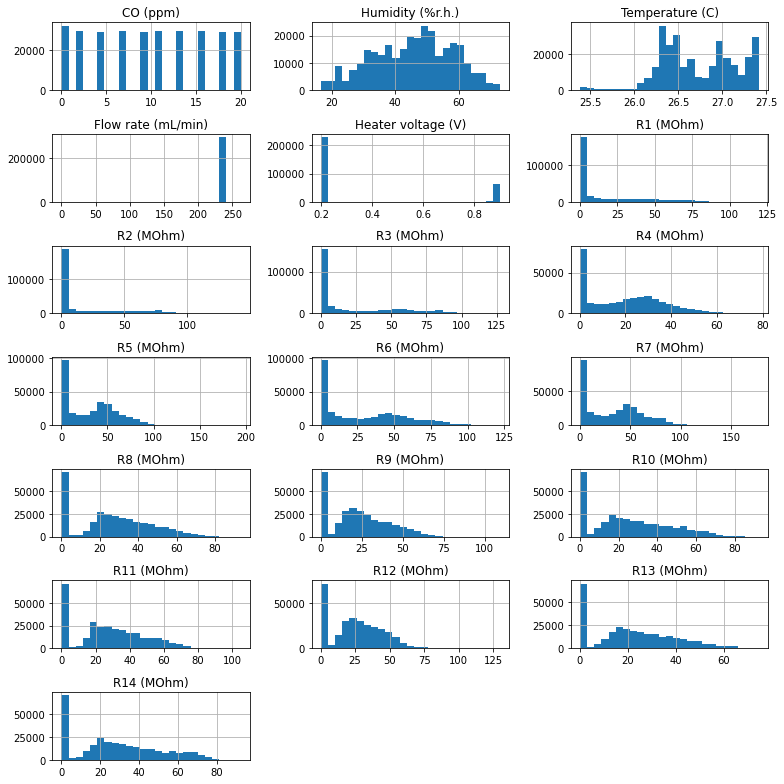

In [5]:
#
plot_histogram_grid(my_data, my_data.columns[1:], 7, 3, 25)
#

<Figure size 936x792 with 0 Axes>

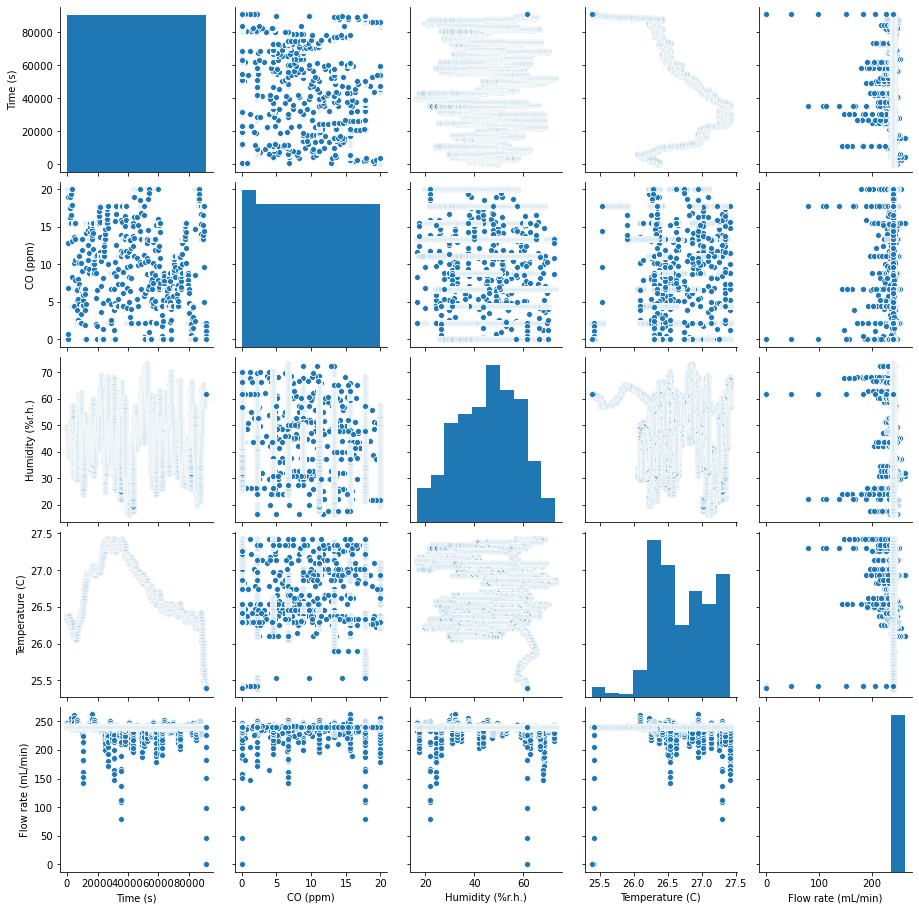

In [15]:
#
plt.figure(figsize = (13, 11))
sns.pairplot(my_data.iloc[:, :5])
#

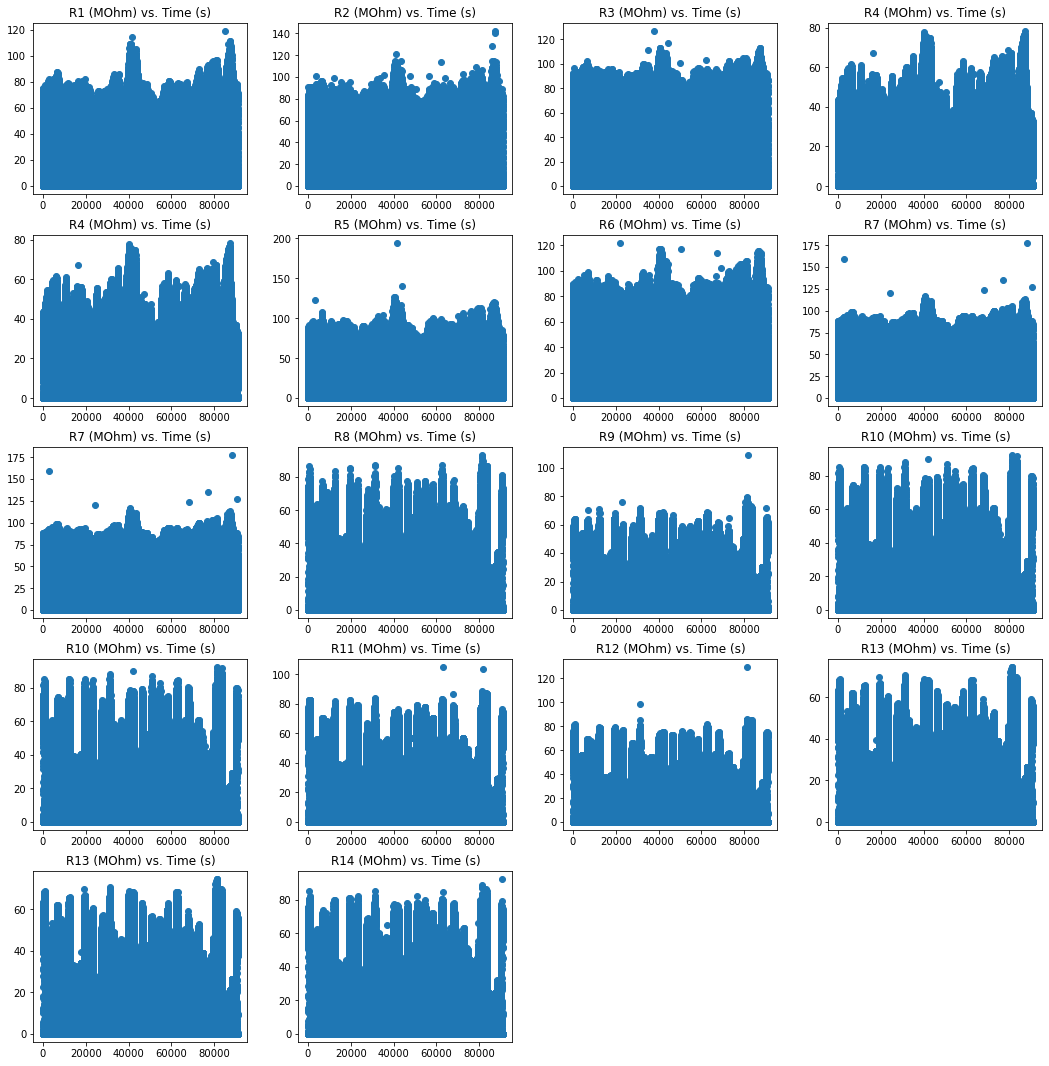

In [8]:
#
plot_cols = list(my_data.loc[:, 'R1 (MOhm)': ].columns)
plot_scatter_grid(my_data, plot_cols, 'Time (s)', 5, 4)
#

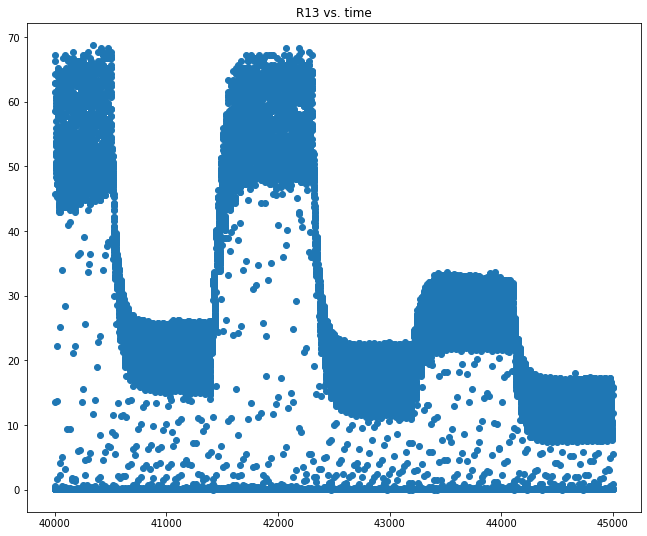

In [17]:
#
fig, ax = plt.subplots(figsize = (11, 9))
ax.scatter(my_data.loc[(my_data['Time (s)'] > 40000) &
                      (my_data['Time (s)'] < 45000), 'Time (s)'],
          my_data.loc[(my_data['Time (s)'] > 40000) &
                      (my_data['Time (s)'] < 45000), 'R13 (MOhm)'])
ax.set_title('R13 vs. time')
plt.show()
#

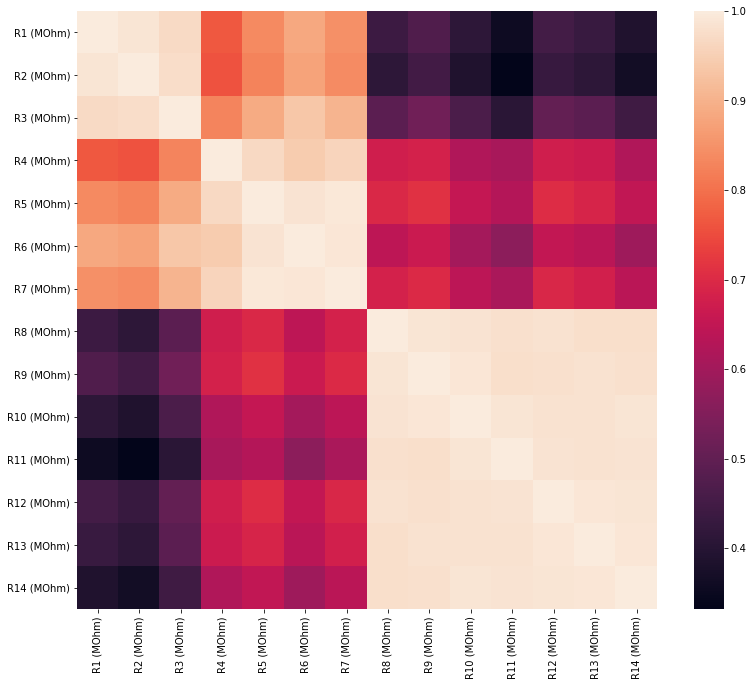

In [9]:
#
plt.figure(figsize = (13, 11))
sns.heatmap(my_data.loc[:, 'R1 (MOhm)':].corr())
#

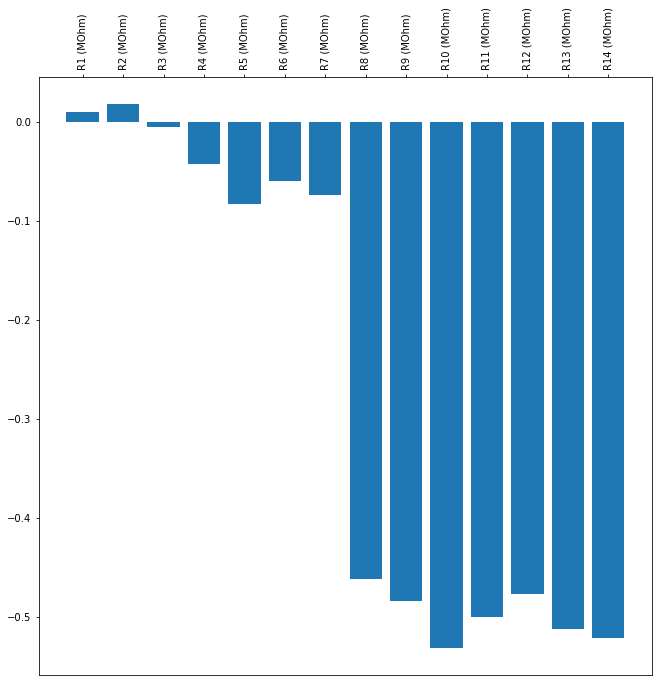

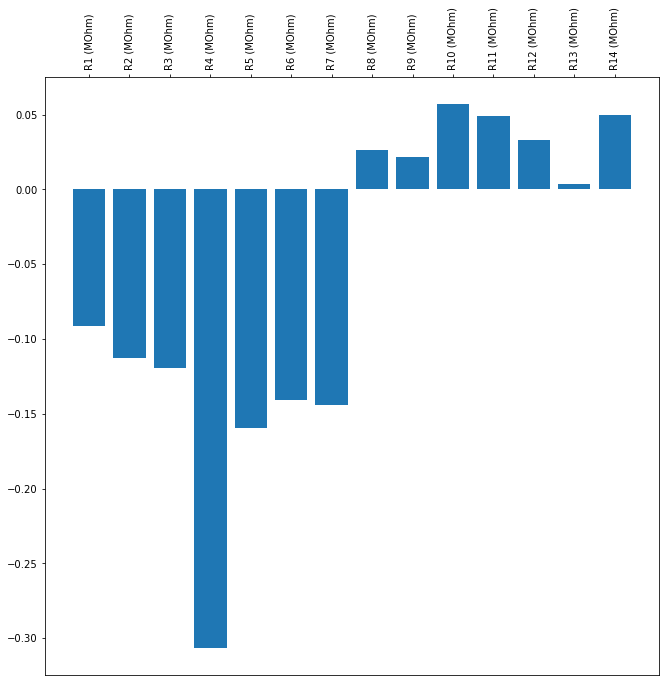

In [10]:
#
# we see two or three groups in the sensor correlations
#
# the data description 
# (https://archive.ics.uci.edu/ml/datasets/Gas+sensor+array+temperature+modulation)
# says there are two kinds of sensors:
# "(7 units of TGS 3870-A04) and FIS (7 units of SB-500-12)"
# 
# let's investigate the behavior of these vs. CO and humidity
#
Sensor_CO_corr = pd.concat([my_data.loc[:, ['CO (ppm)', 'Humidity (%r.h.)']],
                            my_data.loc[:, 'R1 (MOhm)':]], axis = 1).corr().loc['CO (ppm)':'Humidity (%r.h.)', 'R1 (MOhm)':]
#
# plot the CO correlations
#
fig, ax = plt.subplots(figsize = (11, 11))
ax.bar(x = Sensor_CO_corr.columns, height = Sensor_CO_corr.loc['CO (ppm)'])
ax.xaxis.set_ticks_position('top')
plt.xticks(rotation = 90)
plt.show()
#
# plot the humidity correlations
#
fig, ax = plt.subplots(figsize = (11, 11))
ax.bar(x = Sensor_CO_corr.columns, height = Sensor_CO_corr.loc['Humidity (%r.h.)'])
ax.xaxis.set_ticks_position('top')
plt.xticks(rotation = 90)
plt.show()
#

In [11]:
#
# the sensors are impacted by humidity
# here we know the humidity, but in the field we would not necessarily
# the fact that the two sensors have very different CO / humidity sensitivity may be usefule
# we see the sensor data are all skewed
# let's add sqrt() transform (since there are 0s and near 0s in those data) to all sensors
# then fit a linaer model
#
sensor_cols = list(my_data.loc[:, 'R1 (MOhm)': ].columns)
for i in range(len(sensor_cols)):
    my_data['sqrt_' + sensor_cols[i]] = np.sqrt(my_data[sensor_cols[i]])
#

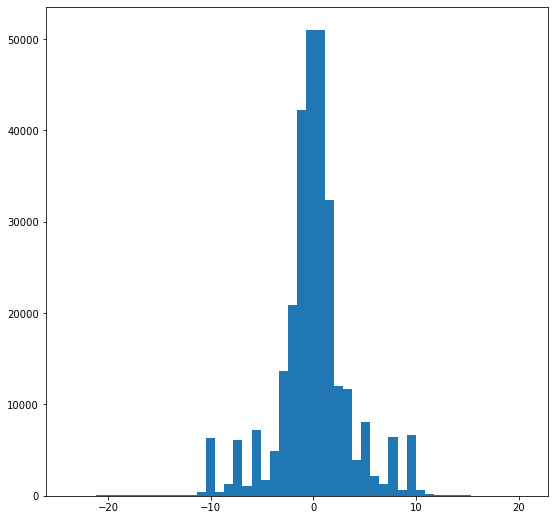

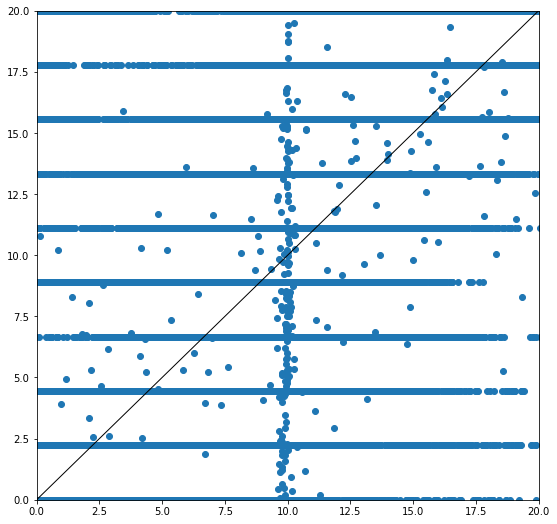

In [12]:
#
model_X = my_data.drop(columns = ['Time (s)', 'Temperature (C)', 'Humidity (%r.h.)', 'CO (ppm)'])
model_y = my_data.loc[:, 'CO (ppm)']
my_model = OLS()
my_model.fit(model_X, model_y)
preds = my_model.predict(model_X)
residuals = preds - model_y
fig, ax = plt.subplots(figsize = (9, 9))
ax.hist(residuals, bins = 50)
plt.show()
#
fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(preds, model_y)
ax.plot([0, 20], [0, 20], color = 'black', lw = 1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
plt.show()
#

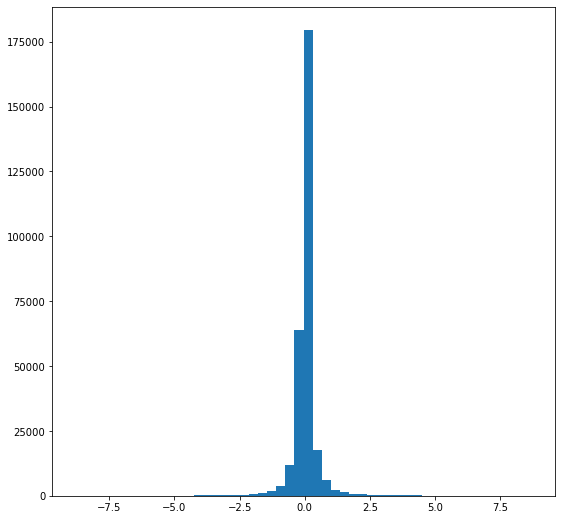

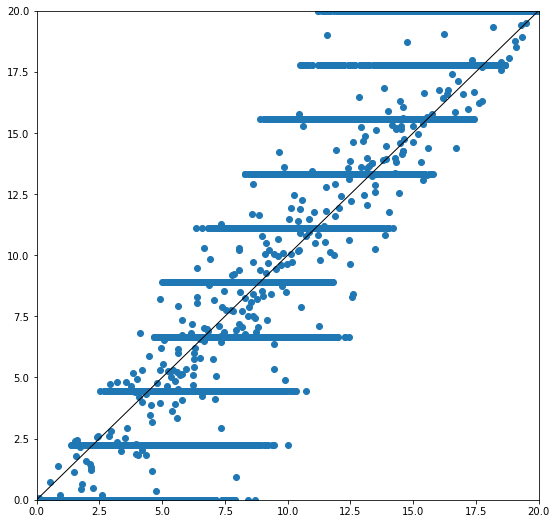

In [13]:
#
# scale the data
# 
scaler = StandardScaler()
model_X = scaler.fit_transform(model_X)
#
# fit a non-linear model
#
RF_model = RandomForestRegressor(n_estimators = 250)
RF_model.fit(model_X, model_y)
#
# look at the residuals
#
preds = RF_model.predict(model_X)
residuals = preds - model_y
#
fig, ax = plt.subplots(figsize = (9, 9))
ax.hist(residuals, bins = 50)
plt.show()
#
# compare predicted to actual
#
fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(preds, model_y)
ax.plot([0, 20], [0, 20], color = 'black', lw = 1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
plt.show()
#